# Auswertung 200218_8

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [118]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_8"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [108]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

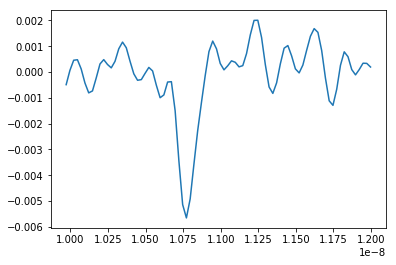

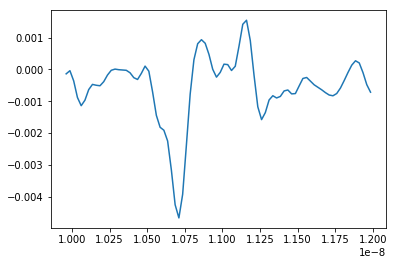

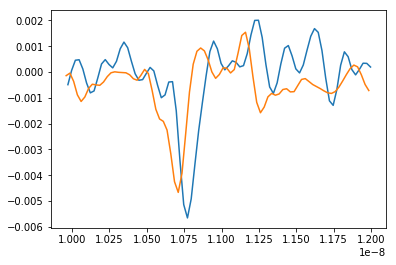

In [263]:
pulsnr = 0
viewImport(C1, C3, pulsnr)

0


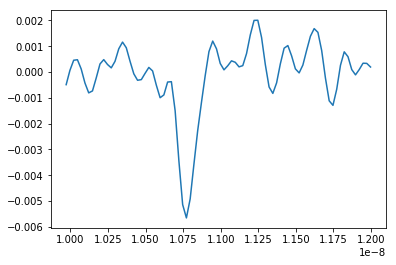

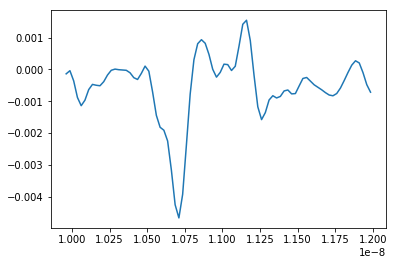

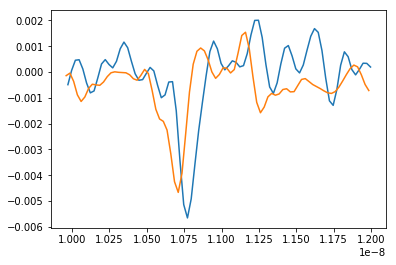

1


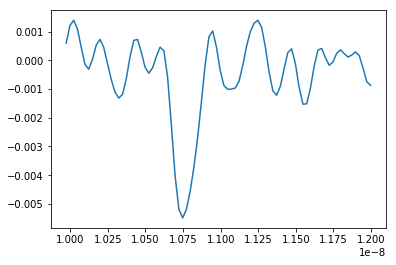

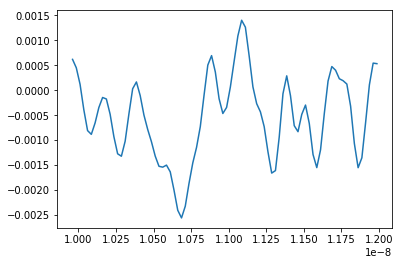

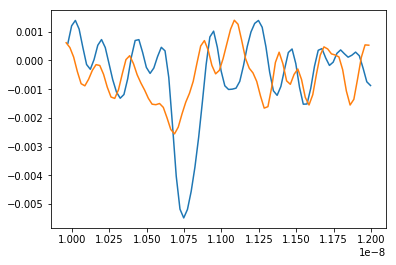

2


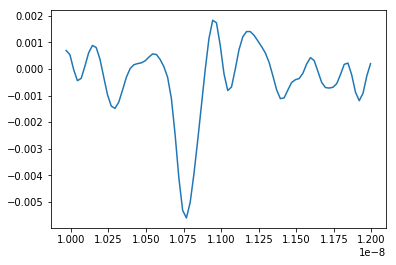

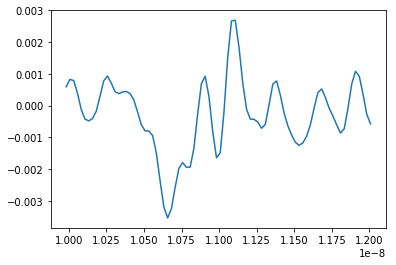

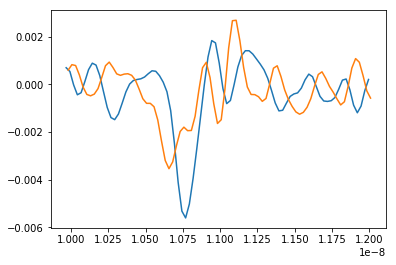

3


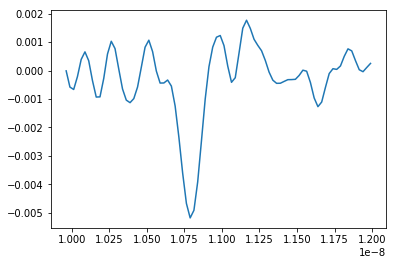

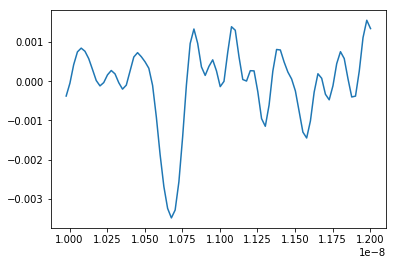

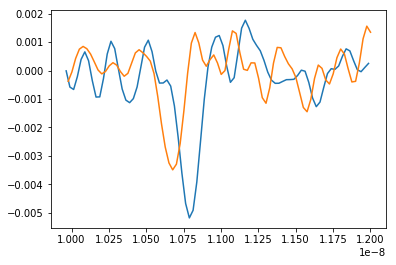

4


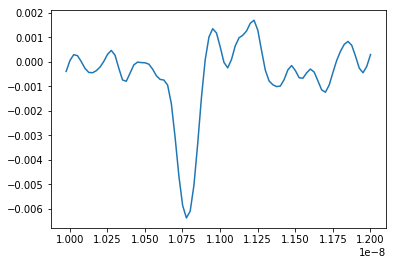

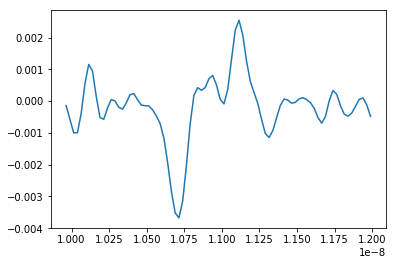

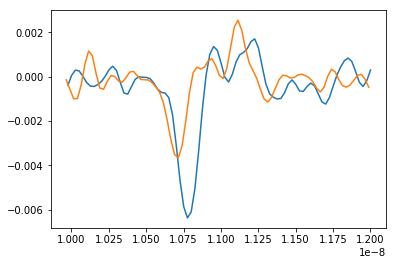

5


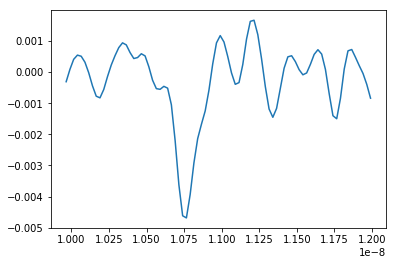

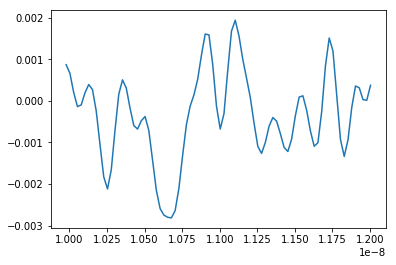

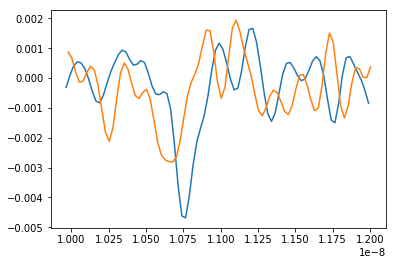

6


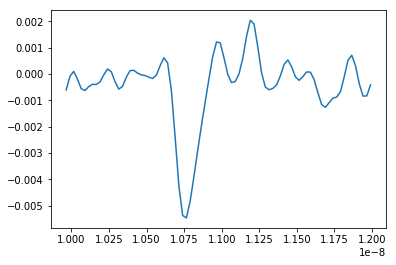

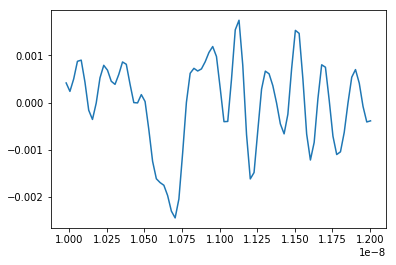

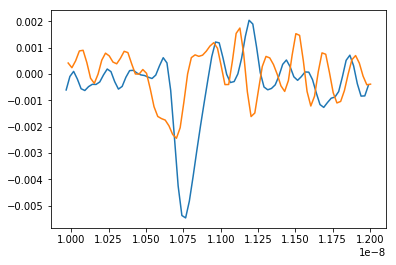

7


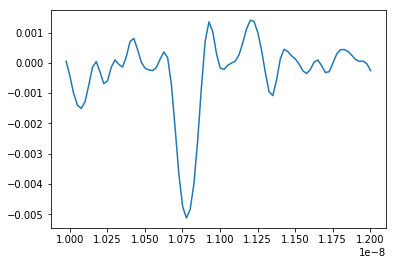

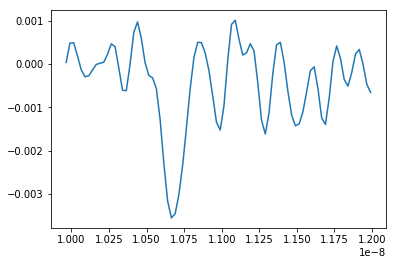

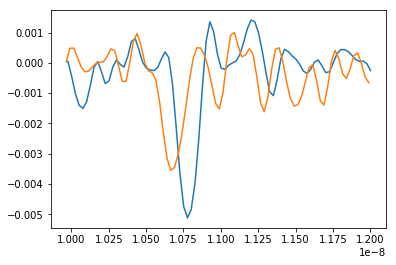

8


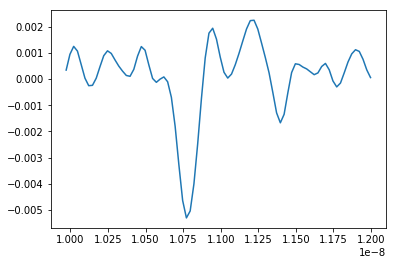

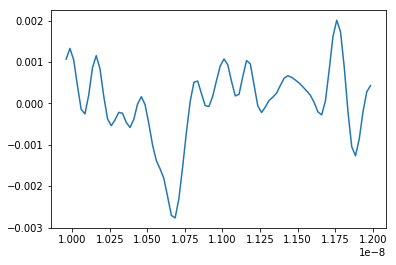

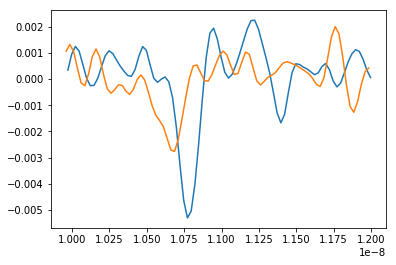

9


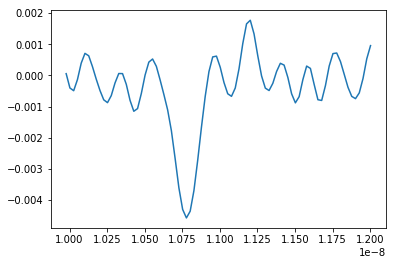

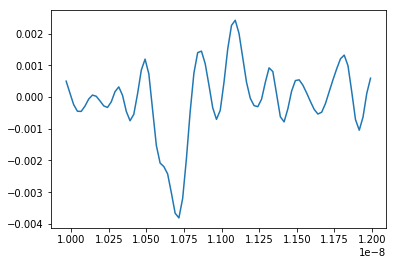

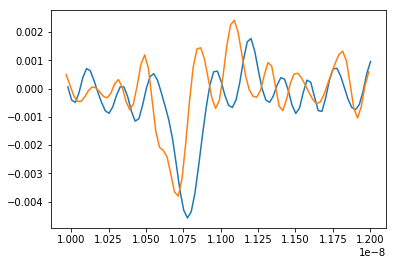

In [85]:
for i in range(0, 10):
    print(i)
    viewImport(C1, C3, i)

In [143]:
#filter

maximum = 468

C1["data"] = np.delete(C1["data"], maximum, axis=0)
C3["data"] = np.delete(C3["data"], maximum, axis=0)

### define area of interest

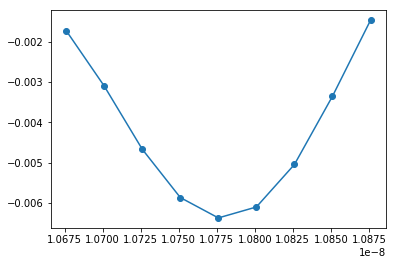

In [95]:
areaMinC1 = 28
areaMaxC1 = 37
pulsnr = 4

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

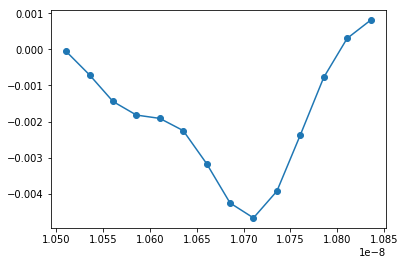

In [264]:
areaMinC3 = 22
areaMaxC3 = 36
pulsnr = 0

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [265]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-12, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-12, 1.07e-8, 5e-11]

In [266]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [267]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

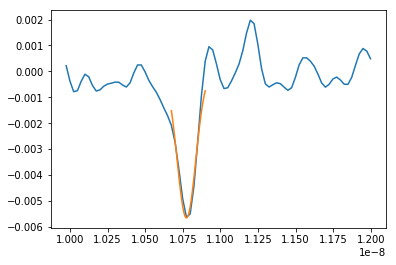

parameter: [-8.77786489e-13  1.07742375e-08  6.19223982e-11] [A, mu, sigma]


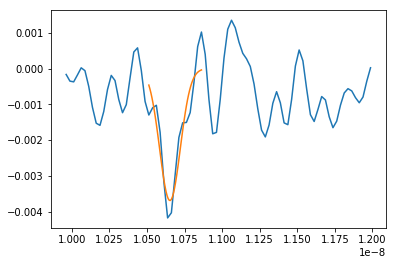

parameter: [-6.36906075e-13  1.06526448e-08  6.88007428e-11] [A, mu, sigma]


In [268]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

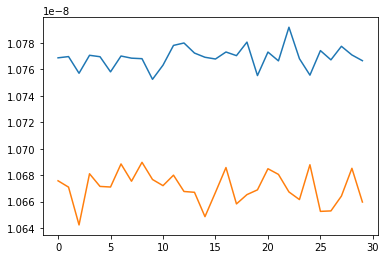

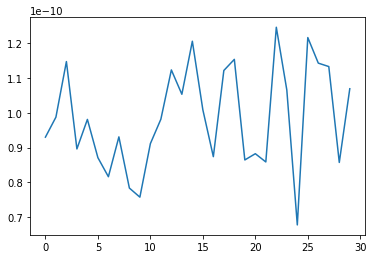

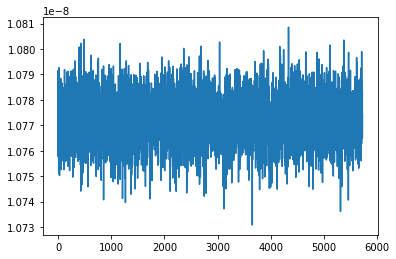

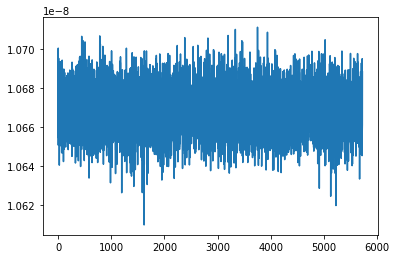

In [269]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [270]:
JitterGauss = jitter(C1, C3, axis = 1)

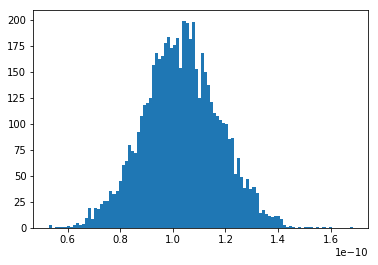

In [271]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

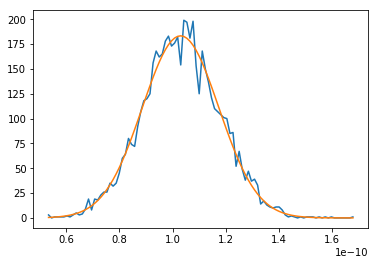

parameter: [6.60742012e-09 1.03009557e-10 1.43799468e-11] [A, mu, sigma]


In [272]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.01e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [273]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 14.379946759426822 ps
σ_1: 10.168157866692225 ps
σ_1 = σ_0 / sqrt(2)

μ: 103.00955712773845 ps

coma separated [σ_0, σ_1, μ]
1.4379946759426821e-11,1.0168157866692224e-11,1.0300955712773845e-10

 tab separated [σ_0, σ_1, μ]
1.4379946759426821e-11	1.0168157866692224e-11	1.0300955712773845e-10


## algorithm 2: min

In [242]:
#filter

maximum = 5650

C1["data"] = np.delete(C1["data"], maximum, axis=0)
C3["data"] = np.delete(C3["data"], maximum, axis=0)

In [243]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [244]:
factor = 0.5

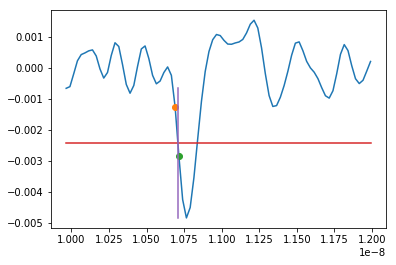

xt: 1.0708811897208704e-08 ps, yt -0.002416184809362676 ps


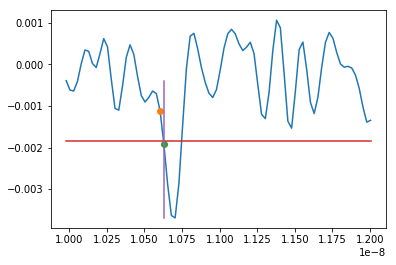

xt: 1.0626742825721422e-08 ps, yt -0.001846524791972115 ps


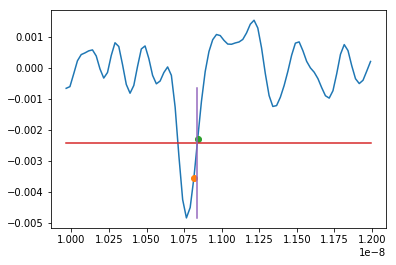

xt: 1.0837880406609784e-08 ps, yt -0.002416184809362676 ps


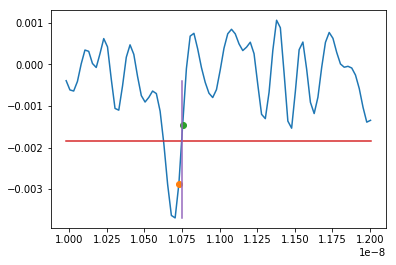

xt: 1.0747026160108206e-08 ps, yt -0.001846524791972115 ps


In [245]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [246]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [247]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

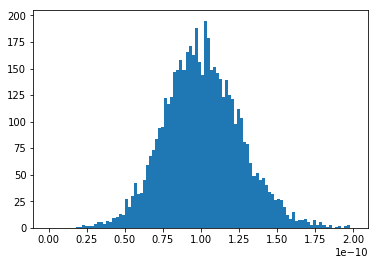

In [251]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins, range = (0, 2e-10))

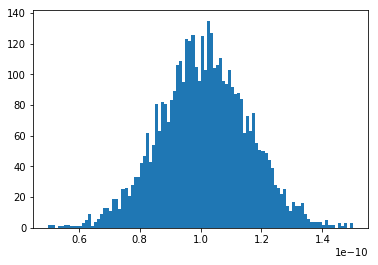

In [254]:
HistThres5c = histogram(JitterThres5c, bins, range = (0.5e-10, 1.5e-10))

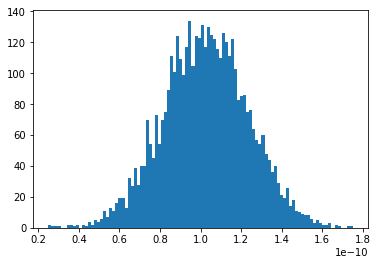

In [257]:
HistThres5r = histogram(JitterThres5r, bins, range = (0.25e-10, 1.75e-10))

### fit gauss to histogram

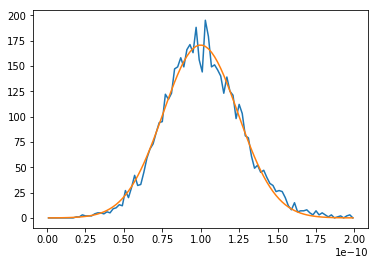

parameter: [1.03914576e-08 9.98940686e-11 2.43075324e-11] [A, mu, sigma]


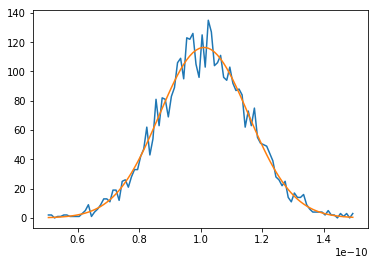

parameter: [4.22237889e-09 1.01109498e-10 1.44685115e-11] [A, mu, sigma]


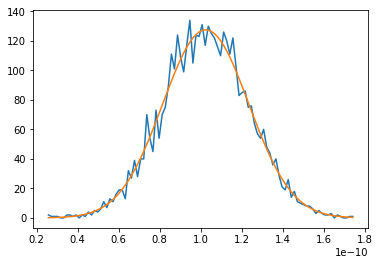

parameter: [6.71059979e-09 1.02505352e-10 2.09940811e-11] [A, mu, sigma]


In [258]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.00e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.00e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [259]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 24.30753235935658 ps
σ_1: 17.188020965212477 ps
σ_1 = σ_0 / sqrt(2)

μ: 99.89406863201278 ps

coma separated [σ_0, σ_1, μ]
2.430753235935658e-11,1.7188020965212476e-11,9.989406863201277e-11

 tab separated [σ_0, σ_1, μ]
2.430753235935658e-11	1.7188020965212476e-11	9.989406863201277e-11

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 14.468511540327924 ps
σ_1: 10.230782623841694 ps
σ_1 = σ_0 / sqrt(2)

μ: 101.10949779033756 ps

coma separated [σ_0, σ_1, μ]
1.4468511540327924e-11,1.0230782623841694e-11,1.0110949779033756e-10

 tab separated [σ_0, σ_1, μ]
1.4468511540327924e-11	1.0230782623841694e-11	1.0110949779033756e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 24.30753235935658 ps
σ_1: 17.188020965212477 ps
σ_1 = σ_0 / sqrt(2)

μ: 99.89406863201278 ps

coma separated [σ_0, σ_1, μ]
2.430753235935658e-11,1.7188020965212476e-11,9.989406863201277e-11

 tab separated [σ_0, σ_1, μ]
2.430753235935658e-11	1.718802